In [1]:
# 필요한 라이브러리들 불러오기
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import layers
from keras import Input
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

tf.random.set_seed(7)

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

(28, 28, 1)


2022-06-27 11:33:22.054492: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-27 11:33:22.408307: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22360 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:18:00.0, compute capability: 8.6


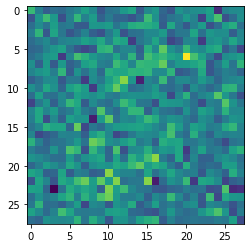

In [3]:
# cnn_input

(x_image_train, _) , (x_image_test, _) = keras.datasets.mnist.load_data()
x_image_train = x_image_train.astype("float32") / 255
x_image_test = x_image_test.astype("float32") / 255

x_image_train = np.expand_dims(x_image_train, -1)
x_image_test = np.expand_dims(x_image_test, -1)


sample = layers.GaussianNoise(0.9)
x_image_train = sample(x_image_train, training = True)
x_image_test = sample(x_image_test, training = True)
plt.imshow(x_image_train[0])
print(x_image_train[0].shape)

In [4]:
# 정답지 생성
train_label_textfile = pd.read_csv('../trainlabels.txt',index_col=False)
train_label = np.array(train_label_textfile)

test_label_textfile = pd.read_csv('../testlabels.txt',index_col=False)
test_label = np.array(test_label_textfile)

y_train = tf.keras.utils.to_categorical(train_label, num_classes=10)
y_test = tf.keras.utils.to_categorical(test_label, num_classes=10)

In [5]:
# 그래프 그려주는 함수
from matplotlib import pyplot as plt

def graph(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(acc)+1)
    
    plt.plot(epochs, acc, 'r',label = 'Training acc')
    plt.plot(epochs, val_acc, 'b',label = 'Validation acc')
    plt.title('Training and validation accuracy')
    
    plt.legend(loc='lower right')
    plt.show()

## 1-1. CNN1

In [6]:
# cnn model 구성
image_input = Input(shape = (28,28,1), dtype = 'float32', name = 'image_mnist')

x = layers.Conv2D(32, kernel_size = (3,3), activation = 'relu')(image_input)
x = layers.MaxPooling2D(pool_size = (2,2))(x)
x = layers.Conv2D(64, kernel_size = (3,3), activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2))(x)
x = layers.Flatten()(x)
image_output = layers.Dropout(0.5)(x)
answer = layers.Dense(10, activation = 'softmax')(image_output)

In [7]:
cnn1 = Model([image_input], answer)
cnn1.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [8]:
cnn1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_mnist (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0     

In [9]:
history1_1 = cnn1.fit([x_image_train], y_train, epochs = 50, batch_size = 128, validation_split = 0.2)

Epoch 1/50


2022-06-27 11:33:23.004693: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-27 11:33:23.853239: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2022-06-27 11:33:25.251481: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


375/375 [==============================] - 5s 6ms/step - loss: 1.0268 - acc: 0.6522 - val_loss: 0.5510 - val_acc: 0.8288
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6132 - acc: 0.7954 - val_loss: 0.4617 - val_acc: 0.8513
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5563 - acc: 0.8152 - val_loss: 0.4359 - val_acc: 0.8587
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5275 - acc: 0.8244 - val_loss: 0.4263 - val_acc: 0.8631
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5116 - acc: 0.8271 - val_loss: 0.4215 - val_acc: 0.8607
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4995 - acc: 0.8335 - val_loss: 0.4097 - val_acc: 0.8682
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4933 - acc: 0.8363 - val_loss: 0.4088 - val_acc: 0.8656
Epoch 8/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4897 - acc:

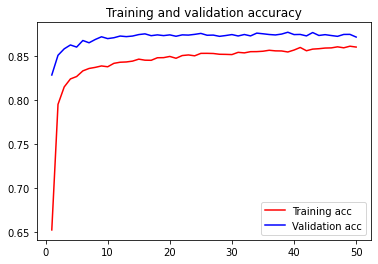

In [10]:
graph(history1_1)

In [11]:
cnn1.evaluate([x_image_test], y_test, verbose=2)

313/313 - 1s - loss: 0.3783 - acc: 0.8763


[0.3782758116722107, 0.8762999773025513]

## 1-2 CNN2

In [12]:
# 모델구성
# cnn model 구성 with lenet
image_input = Input(shape = (28,28,1), dtype = 'float32', name = 'image_mnist')

x = layers.Conv2D(20, kernel_size = 5, padding = 'same')(image_input)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))(x)
x = layers.Conv2D(50, kernel_size = 5, padding = 'same')(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(500)(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.5)(x)
answer = layers.Dense(10, activation = 'softmax')(x)

In [13]:
# 컴파일

cnn2 = Model([image_input], answer)
cnn2.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [14]:
# summary()
cnn2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_mnist (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0   

In [15]:
# 학습
history1_2 = cnn2.fit([x_image_train], y_train, epochs = 50, batch_size = 128, validation_split = 0.2)

Epoch 1/50
375/375 [==============================] - 2s 6ms/step - loss: 0.8487 - acc: 0.7121 - val_loss: 0.4395 - val_acc: 0.8570
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4603 - acc: 0.8465 - val_loss: 0.3876 - val_acc: 0.8703
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3962 - acc: 0.8682 - val_loss: 0.3572 - val_acc: 0.8813
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3527 - acc: 0.8819 - val_loss: 0.3488 - val_acc: 0.8853
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3229 - acc: 0.8911 - val_loss: 0.3445 - val_acc: 0.8875
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2930 - acc: 0.9009 - val_loss: 0.3592 - val_acc: 0.8839
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2699 - acc: 0.9094 - val_loss: 0.3444 - val_acc: 0.8890
Epoch 8/50
375/375 [==============================] - 2s 5ms/step - loss: 0.

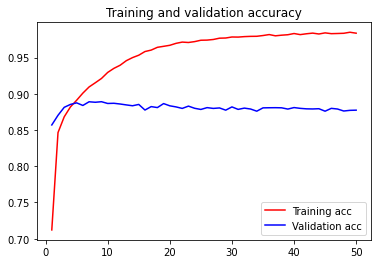

In [16]:
# 그래프
graph(history1_2)

In [17]:
# evaluate
cnn2.evaluate([x_image_test], y_test, verbose=2)

313/313 - 1s - loss: 0.7837 - acc: 0.8806


[0.783677875995636, 0.8805999755859375]

## 1-3 CNN3

In [18]:
# cnn model 구성 with lenet
image_input = Input(shape = (28,28,1), dtype = 'float32', name = 'image_mnist')

x = layers.Conv2D(20, kernel_size = 5, padding = 'same')(image_input)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))(x)
x = layers.Conv2D(50, kernel_size = 5, padding = 'same')(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))(x)
x = layers.Conv2D(100, kernel_size = 5, padding = 'same')(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(500)(x)
x = layers.Activation("relu")(x)
x = layers.Dense(1000)(x)
x = layers.Activation("relu")(x)
x = layers.Dense(250)(x)
x = layers.Activation("relu")(x)
x = layers.Dropout(0.5)(x)
answer = layers.Dense(10, activation = 'softmax')(x)



In [19]:
cnn3 = Model([image_input], answer)
cnn3.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [20]:
cnn3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_mnist (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_4 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 50)          0   

In [21]:
# 학습
history1_3 = cnn3.fit([x_image_train], y_train, epochs = 50, batch_size = 128, validation_split = 0.2)

Epoch 1/50
375/375 [==============================] - 3s 8ms/step - loss: 0.9522 - acc: 0.6780 - val_loss: 0.4917 - val_acc: 0.8395
Epoch 2/50
375/375 [==============================] - 3s 7ms/step - loss: 0.4727 - acc: 0.8500 - val_loss: 0.4212 - val_acc: 0.8627
Epoch 3/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3920 - acc: 0.8760 - val_loss: 0.4139 - val_acc: 0.8699
Epoch 4/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3393 - acc: 0.8916 - val_loss: 0.3967 - val_acc: 0.8733
Epoch 5/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3007 - acc: 0.9028 - val_loss: 0.3995 - val_acc: 0.8763
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.2642 - acc: 0.9130 - val_loss: 0.3964 - val_acc: 0.8791
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.2280 - acc: 0.9236 - val_loss: 0.4106 - val_acc: 0.8775
Epoch 8/50
375/375 [==============================] - 3s 7ms/step - loss: 0.

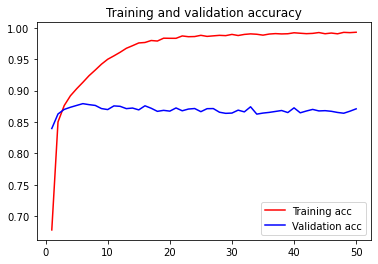

In [22]:
# 그래프
graph(history1_3)

In [23]:
# evaluate
cnn3.evaluate([x_image_test], y_test, verbose=2)

313/313 - 1s - loss: 1.4502 - acc: 0.8688


[1.450178861618042, 0.8687999844551086]